In [23]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import interferometer as itf
from scipy.linalg import expm, logm
sys.path.append('../') # Add parent directory to the system path
from boson_sampling_probabilities import output_probability
from direct_decomposition import random_unitary, direct_decomposition
from simulation import run_interferom_simulation, dist_to_state, state_to_dist
from numeric_truncated_unitaries import numeric_truncated_unitary

In [35]:
# Make a random unitary R to simulate
R = random_unitary(3)
print(R)

[[ 0.43376667-0.33158536j  0.17544468+0.46644634j  0.39859829-0.54282963j]
 [ 0.14369632+0.32896668j  0.05887538+0.70546261j -0.6002669 +0.09832662j]
 [ 0.3017123 +0.69426191j  0.32969002-0.37657357j -0.02620259-0.41926167j]]


In [36]:
initial_dist = [1,0,0]
initial_state = "100"
possible_dists = [[1,0,0], [0,1,0], [0,0,1]] # Every configuration of 1 photon in 3 modes

analytic_probs = dict()
for dist in possible_dists:
    prob = output_probability(dist, initial_dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

print(analytic_probs)

{'100': 0.2981023751305728, '010': 0.248353026455246, '001': 0.45354459841418115}


In [37]:
probs_1e3 = run_interferom_simulation(R, initial_dist, 1e3)
probs_1e4 = run_interferom_simulation(R, initial_dist, 1e4)
probs_1e5 = run_interferom_simulation(R, initial_dist, 1e5)

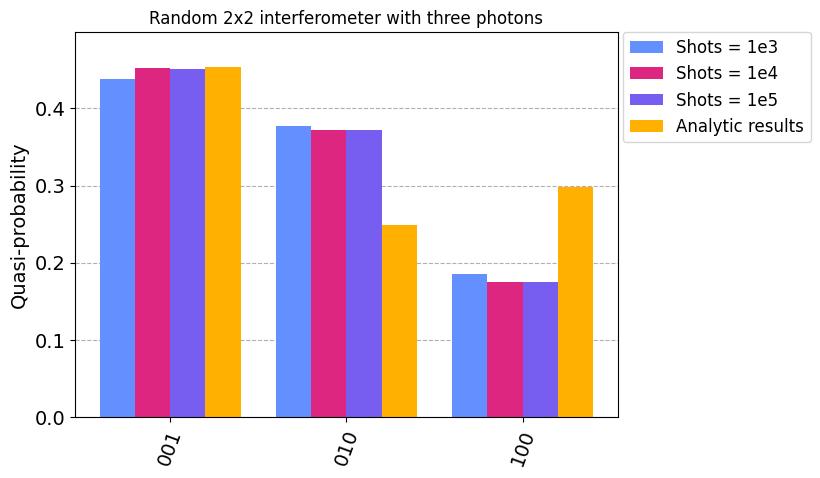

In [38]:
legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], legend=legend, 
               title='Random 2x2 interferometer with three photons', 
               bar_labels=False)

In [39]:
big_circuit = direct_decomposition(R, 1)

In [40]:
# print(big_circuit)
big_circuit.draw()

┌─────────────────────┐          ┌───────────────────┐          »
q_0: ─┤ U3(π/2,π/2,0.33129) ├───■──────┤ U3(2.155,-π,-π/2) ├───────■──»
     ┌┴─────────────────────┴┐┌─┴─┐┌───┴───────────────────┴────┐┌─┴─┐»
q_1: ┤ U3(3.1403,π/2,3.0312) ├┤ X ├┤ U3(1.5714,0.58419,-1.5697) ├┤ X ├»
     └───────────────────────┘└───┘└────────────────────────────┘└───┘»
q_2: ─────────────────────────────────────────────────────────────────»
                                                                      »
«      ┌─────────────────────┐  ┌─────────────┐ ░ »
«q_0: ─┤ U3(π/2,-0.33129,-π) ├──┤ U1(-2.0635) ├─░─»
«     ┌┴─────────────────────┴─┐└─────────────┘ ░ »
«q_1: ┤ U3(1.5695,0.11043,π/2) ├────────────────░─»
«     └────────────────────────┘                ░ »
«q_2: ──────────────────────────────────────────░─»
«                                               ░ »
«                                                                            »
«q_0: ───────────────────────────────────────────────────────────────────────»
«         ┌─────────────────────┐             ┌────────────────────┐         »
«q_1: ────┤ U3(π/2,-π/2,1.7642) ├──────■──────┤ U3(2.0043,-π,-π/2) ├──────■──»
«     ┌───┴─────────────────────┴───┐┌─┴─┐┌───┴────────────────────┴───┐┌─┴─┐»
«q_2: ┤ U3(0.0013233,-π/2,-0.58808) ├┤ X ├┤ U3(1.5716,0.43353,-1.5696) ├┤ X ├»
«     └─────────────────────────────┘└───┘└────────────────────────────┘└───┘»
«                                                ░ »
«q_0: ───────────────────────────────────────────░─»
«        ┌───────────────────┐   ┌─────────────┐ ░ »
«q_1: ───┤ U3(π/2,-1.7642,0) ├───┤ U1(-5.2804) ├─░─»
«     ┌──┴───────────────────┴──┐└─────────────┘ ░ »
«q_2: ┤ U3(1.5721,-2.5535,-π/2) ├────────────────░─»
«     └─────────────────────────┘                ░ »
«        ┌─────────────────────┐            ┌────────────────────┐         »
«q_0: ───┤ U3(π/2,-π/2,1.7746) ├─────■──────┤ U3(2.3054,-π,-π/2) ├──────■──»
«     ┌──┴─────────────────────┴──┐┌─┴─┐┌───┴────────────────────┴───┐┌─┴─┐»
«q_1: ┤ U3(0.0013233,-π/2,1.5029) ├┤ X ├┤ U3(1.5712,0.73458,-1.5698) ├┤ X ├»
«     └───────────────────────────┘└───┘└────────────────────────────┘└───┘»
«q_2: ─────────────────────────────────────────────────────────────────────»
«                                                                          »
«       ┌───────────────────┐   ┌───────────┐ ░ 
«q_0: ──┤ U3(π/2,-1.7746,0) ├───┤ U1(-5.13) ├─░─
«     ┌─┴───────────────────┴──┐└───────────┘ ░ 
«q_1: ┤ U3(1.5721,1.6387,-π/2) ├──────────────░─
«     └────────────────────────┘              ░ 
«q_2: ────────────────────────────────────────░─
«                                             ░

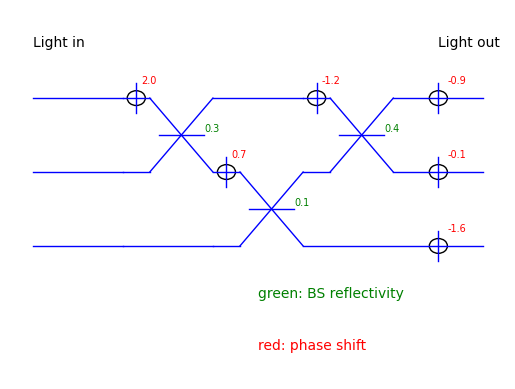

In [41]:
I = itf.square_decomposition(R)
I.draw()

In [18]:
i = itf.Interferometer()
i.add_BS(I.BS_list[0])
r = i.calculate_transformation()
c1 = direct_decomposition(r, 1)
c1.draw()

┌─────────────────────┐          ┌────────────────────┐        »
q_0: ─┤ U3(π/2,π/2,-2.8797) ├────■─────┤ U3(2.6346,-π,-π/2) ├─────■──»
     ┌┴─────────────────────┴─┐┌─┴─┐┌──┴────────────────────┴──┐┌─┴─┐»
q_1: ┤ U3(3.1403,π/2,-2.1817) ├┤ X ├┤ U3(1.571,1.0638,-1.5702) ├┤ X ├»
     └────────────────────────┘└───┘└──────────────────────────┘└───┘»
«       ┌───────────────────┐   ┌────────────┐ ░ 
«q_0: ──┤ U3(π/2,2.8797,-π) ├───┤ U1(-1.824) ├─░─
«     ┌─┴───────────────────┴──┐└────────────┘ ░ 
«q_1: ┤ U3(1.5695,-0.9599,π/2) ├───────────────░─
«     └────────────────────────┘               ░

In [42]:
i = itf.Interferometer()
i.add_BS(I.BS_list[1])
r = i.calculate_transformation()
c2 = direct_decomposition(r, 1)
c2.draw()

┌───────┐ ░                                     »
q_0: ┤ U1(0) ├─░─────────────────────────────────────»
     └───────┘ ░     ┌─────────────────────┐         »
q_1: ──────────░─────┤ U3(π/2,-π/2,1.7642) ├──────■──»
               ░ ┌───┴─────────────────────┴───┐┌─┴─┐»
q_2: ──────────░─┤ U3(0.0013233,-π/2,-0.58808) ├┤ X ├»
               ░ └─────────────────────────────┘└───┘»
«                                                                   »
«q_0: ──────────────────────────────────────────────────────────────»
«         ┌────────────────────┐            ┌───────────────────┐   »
«q_1: ────┤ U3(2.0043,-π,-π/2) ├──────■─────┤ U3(π/2,-1.7642,0) ├───»
«     ┌───┴────────────────────┴───┐┌─┴─┐┌──┴───────────────────┴──┐»
«q_2: ┤ U3(1.5716,0.43353,-1.5696) ├┤ X ├┤ U3(1.5721,-2.5535,-π/2) ├»
«     └────────────────────────────┘└───┘└─────────────────────────┘»
«                     ░ ┌───────┐ ░ 
«q_0: ────────────────░─┤ U1(0) ├─░─
«     ┌─────────────┐ ░ └───────┘ ░ 
«q_1: ┤ U1(-5.2804) ├─░───────────░─
«     └─────────────┘ ░           ░ 
«q_2: ────────────────░───────────░─
«                     ░           ░

In [20]:
i = itf.Interferometer()
i.add_BS(I.BS_list[2])
r = i.calculate_transformation()
c2 = direct_decomposition(r, 1)
c2.draw()

┌─────────────────────┐             ┌───────────────────┐          »
q_0: ────┤ U3(π/2,-π/2,1.3037) ├──────■──────┤ U3(2.274,-π,-π/2) ├───────■──»
     ┌───┴─────────────────────┴───┐┌─┴─┐┌───┴───────────────────┴────┐┌─┴─┐»
q_1: ┤ U3(0.0013233,-π/2,-0.43457) ├┤ X ├┤ U3(1.5713,0.70319,-1.5698) ├┤ X ├»
     └─────────────────────────────┘└───┘└────────────────────────────┘└───┘»
«       ┌───────────────────┐   ┌─────────────┐ ░ 
«q_0: ──┤ U3(π/2,-1.3037,0) ├───┤ U1(-5.1457) ├─░─
«     ┌─┴───────────────────┴──┐└─────────────┘ ░ 
«q_1: ┤ U3(1.5721,-2.707,-π/2) ├────────────────░─
«     └────────────────────────┘                ░

In [21]:
I.BS_list

[
  Beam splitter between modes 1 and 2: 
  Theta angle: 0.51 
  Phase: -2.27,
 
  Beam splitter between modes 2 and 3: 
  Theta angle: 1.44 
  Phase: -2.32,
 
  Beam splitter between modes 1 and 2: 
  Theta angle: 0.87 
  Phase: 0.17]

In [26]:
u1 = numeric_truncated_unitary(I.BS_list[0].theta, I.BS_list[0].phi, 1)
u2 = numeric_truncated_unitary(I.BS_list[1].theta, I.BS_list[1].phi, 1)
u3 = numeric_truncated_unitary(I.BS_list[2].theta, I.BS_list[2].phi, 1)

u1.shape

(4, 4)